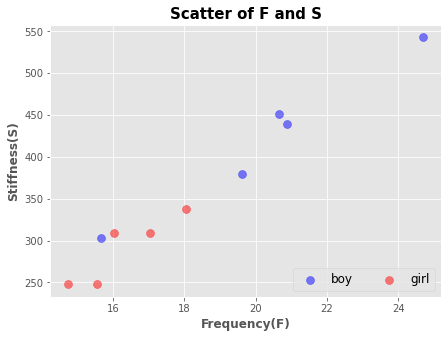

In [222]:
import pandas as pd               # 資料處理套件
import matplotlib.pyplot as plt   
plt.figure(figsize=(7,5))   # 顯示圖框架大小

plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.xlabel("Frequency(F)", fontweight = "bold")                  #設定x座標標題及粗體
plt.ylabel("Stiffness(S)", fontweight = "bold")   #設定y座標標題及粗體
plt.title("Scatter of F and S",
          fontsize = 15, fontweight = "bold")        #設定標題、字大小及粗體
x=[19.61,24.7,20.66,20.89,15.66,17.04,18.06,15.54,14.74,16.02]
y=[379.2,542.8,451.3,439,302.9,309.5,337.7,247.9,247.6,308.6]
p1=plt.scatter(x[0:5],                    # x軸資料
            y[0:5],     # y軸資料
            c = "b",                                  # 點顏色
            s = 65,                                   # 點大小
            alpha = .5,                               # 透明度
            marker = "o")                             # 點樣式

p2=plt.scatter(x[5:10],                    # x軸資料
            y[5:10],     # y軸資料
            c = "r",                                  # 點顏色
            s = 65,                                   # 點大小
            alpha = .5,                               # 透明度
            marker = "o")  

plt.legend((p1,p2),
           ('boy', 'girl'),
           scatterpoints=1,
           loc='lower right',
           ncol=6,
           fontsize=12)

In [223]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性
import os
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.linear_model import LinearRegression
import glob
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
plt.rc("font",family="SimHei",size="15")  #解决中文乱码问题

# 在 jupyter notebook 里面显示图表
%matplotlib inline 


In [224]:
path = "C:/小腿F"
# 路徑(大資料夾，底下放所有聲檔的聲學參數，每個人都存一個CSV檔，檔名為小腿肌力測試1 or2 or3.....csv)
files_joined = os.path.join("C:/小腿F", "小腿肌力測試*.csv")

# 記錄所有檔名(list)
list_files = glob.glob(files_joined)
len(list_files)

10

### 資料儲存

In [225]:
train_df = pd.DataFrame(columns=['Model name','dataset','MSE','RMSE','MAE','MAPE','R-squared'])
test_df = pd.DataFrame(columns=['Model name','dataset','MSE','RMSE','MAE','MAPE','R-squared'])

In [226]:
#from sklearn.model_selection import train_test_split
#train_data, test_data =train_test_split(data, train_size=0.8)

### 資料分割

In [227]:
#建立空dataframe 儲存切割後資料
train_data =  pd.DataFrame()
test_data = pd.DataFrame()

In [228]:
#將每個cross correlation後資料先行80/20 避免資料不平衡
from sklearn.preprocessing import MinMaxScaler
for i in range (0,len(list_files)):
    data = pd.read_csv(list_files[i])
    train, test =train_test_split(data, train_size=0.8)
    global train_data
    global test_data
    train_data = pd.concat([train_data,train],axis=0, ignore_index=True)
    test_data = pd.concat([test_data,test],axis=0, ignore_index=True)

In [229]:
#train_data = pd.DataFrame(train_data)
#test_data = pd.DataFrame(test_data)

In [230]:
#欄位名稱
#非物理特徵
#fn = ['meanfreq','sd','freq.median','freq.Q25','freq.Q75','freq.IQR','time.median','time.Q25','time.Q75','time.IQR','skew','kurt','sp.ent','time.ent','entropy','sfm','meandom','mindom','maxdom','dfrange','modindx','startdom','enddom','dfslope','meanpeakf']
#物理特徵
fn=['meanfreq','sd', 'freq.median', 'freq.Q25',
       'freq.Q75', 'freq.IQR', 'time.median', 'time.Q25', 'time.Q75', 'time.IQR',
       'skew', 'kurt', 'sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom',
       'mindom', 'maxdom', 'dfrange', 'modindx', 'startdom', 'enddom',
       'dfslope', 'meanpeakf']

#fn = ['# pitch','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','zero_cross','p1','p2','p3','p4']

In [231]:
#原始數據
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

train_X = train_data[fn]


train_y = train_data['sound.files']


test_X = test_data[fn]

test_y = test_data['sound.files']


In [232]:
def train_result(pred,name):
    x=train_y.values
    y=pred
    my_rho = np.corrcoef(x,y)
    print("Pearson關係數:",my_rho)

In [233]:
def test_result(pred,name):
    x=test_y.values
    y=pred
    my_rho = np.corrcoef(x,y)
    print("Pearson關係數:",my_rho)

### 回歸圖

In [234]:
if not os.path.isdir(path+'\\百分比\\迴歸圖(1s)'):
    os.makedirs(path+'\\百分比\\迴歸圖(1s)')

In [235]:
#未平均
def train_plot(pre,name):
    plt.title(name+" Train")
    plt.scatter(pre, train_y,c='c')
    plt.xlabel('predict')
    plt.ylabel('true value')
    plt.axis([min(train_y), max(train_y)+0.2, min(train_y), max(train_y)+0.2])
    plt.savefig(path+'\\百分比\\迴歸圖(1s)\\'+name+'train.png')
    plt.show()

In [236]:
#未平均
def test_plot(pre,name):
    plt.title(name+" Test")
    plt.scatter(pre, test_y,c='c')
    plt.xlabel('predict')
    plt.ylabel('true value')
    plt.axis([min(test_y), max(test_y)+0.2, min(test_y), max(test_y)+0.2])
    plt.savefig(path+'\\百分比\\迴歸圖(1s)\\'+name+'test.png')
    plt.show()

In [237]:
from sklearn.preprocessing import MinMaxScaler
true_array = [14.74,20.66,20.89,17.04,16.02,15.66,19.61,18.06,15.54,24.7]


true_df = pd.DataFrame(true_array)

Standard_data=MinMaxScaler().fit_transform(true_df)


Standard_data


array([[0.        ],
       [0.59437751],
       [0.61746988],
       [0.23092369],
       [0.12851406],
       [0.09236948],
       [0.48895582],
       [0.33333333],
       [0.08032129],
       [1.        ]])

In [238]:
def average_train_plot(pre,name):
    true_array = [19.61,24.7,20.66,20.89,15.66,17.04,18.06,15.54,14.74,16.02]
    #true_array = [0.49,1,0.59,0.62,0.09,0.23,0.33,0.08,0,0.13]
 

    true_df = pd.DataFrame(true_array)

    average =  pd.DataFrame()


    for i in range(0,10):
        #print(i)
        index1 = i*160
        index2 = index1+160
        a = pre[index1:index2]
        k = a.mean()
        k = [k]
        k = pd.DataFrame(k)
        average = pd.concat([average,k],axis=0, ignore_index=True)
   
    plt.title(name+" Train")
    plt.scatter(average[0:5], true_df[0:5],c='b',alpha = .5)
    plt.scatter(average[5:10], true_df[5:10],c='r',alpha = .5)
    plt.xlabel('predict')
    plt.ylabel('true value')
    plt.axis([min(train_y), max(train_y)+0.2, min(train_y), max(train_y)+0.2])
    plt.legend((p1,p2),
           ('boy', 'girl'),
           scatterpoints=1,
           loc='lower right',
           ncol=5,
           fontsize=10)
    plt.savefig(path+'\\百分比\\迴歸圖(1s)\\'+name+'train(平均).png')
    plt.show()
    
       
    average=average.values
    true_df=true_df.values
    print(average)
    print(true_df)
    
    Regression = sum((average - np.mean(true_df))**2) # 回归平方和
    Residual   = sum((true_df - average)**2)         # 残差平方和    
    abs_reg=sum(abs(true_df - average))  

    
    mse =  Residual /10
    rmse = mse**0.5
    mae = abs_reg/10
    mape =(sum(((true_df - average)**2)/true_df))/10
    

    total = sum((true_df-np.mean(true_df))**2) #总体平方和
    R_square   =  1-Residual / total # 相关性系数R^2

    
    df = pd.DataFrame({
    'Model name': name,
    'dataset':'train',
    'MSE': np.round(mse,2),
    'RMSE':np.round(rmse,2),
    'MAE':np.round(mae,2),
    'MAPE':np.round(mape,2),
    'R-squared': np.round(R_square,2)},index=[0])
    global train_df
    train_df = pd.concat([train_df,df],axis=0, ignore_index=True)
    return train_df

In [239]:
def average_test_plot(pre,name):
    
    #true_array =  [0.49,1,0.59,0.62,0.09,0.23,0.33,0.08,0,0.13]
    true_array = [19.61,24.7,20.66,20.89,15.66,17.04,18.06,15.54,14.74,16.02]
                  
               
    average =  pd.DataFrame()
    true_df = pd.DataFrame(true_array)
  
    for i in range(0,10):
        #print(i)
        index1 = i*40
        index2 = index1+40
        a = pre[index1:index2]
        k = a.mean()
        k = [k]
        k = pd.DataFrame(k)
        average = pd.concat([average,k],axis=0, ignore_index=True)
      
    
    plt.title(name+" Test")
    plt.scatter(average[0:5], true_df[0:5],c='b',alpha = .5)
    plt.scatter(average[5:10], true_df[5:10],c='r',alpha = .5)
    plt.xlabel('predict')
    plt.ylabel('true value')
    plt.axis([min(test_y), max(test_y)+0.2, min(test_y), max(test_y)+0.2])
    plt.legend((p1,p2),
           ('boy', 'girl'),
           scatterpoints=1,
           loc='lower right',
           ncol=5,
           fontsize=10)
    plt.savefig(path+'\\百分比\\迴歸圖(1s)\\'+name+'test(平均).png')
    plt.show()
    
    
    average=average.values
    true_df=true_df.values
    print(average)
    print(true_df)
        
    Regression = sum((average - np.mean(true_df))**2) # 回归平方和
    Residual   = sum((true_df - average)**2)         # 残差平方和    
    abs_reg=sum(abs(true_df - average))  

    mse =  Residual /10
    rmse = mse**0.5
    mae = abs_reg/10
    mape =(sum(((true_df - average)**2)/true_df))/10
    

    Residual   = sum((true_df - average)**2)          # 残差平方和
    total = sum((true_df-np.mean(true_df))**2) #总体平方和
    R_square   =  1-Residual / total  # 相关性系数R^2

    
    df = pd.DataFrame({
    'Model name': name,
    'dataset':'test',
    'MSE': np.round(mse,2),
    'RMSE':np.round(rmse,2),
    'MAE':np.round(mae,2),
    'MAPE':np.round(mape,2),
     'R-squared': np.round(R_square,2)},index=[0])
    
    global test_df
    test_df = pd.concat([test_df,df],axis=0, ignore_index=True)
    return test_df

In [240]:
def average_corr(pre):
    average =  pd.DataFrame()
    for i in range(0,7):
        #print(i)
        index1 = i*20
        index2 = index1+20
        a = pre[index1:index2]
        k = a.mean()
        k = [k]
        k = pd.DataFrame(k)
        average = pd.concat([average,k],axis=0, ignore_index=True)
    x=average.values
    y=true_df.values
    x=x.flatten()
    y=y.flatten()
    
    my_rho = np.corrcoef(x,y)

    print("Pearson相關係數:\n",my_rho)

In [241]:
print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)


(1600, 25)
(1600,)
(400, 25)
(400,)


### Model

### SVR (RBF)

In [272]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

svr_rbf = SVR(kernel="rbf", C=250, gamma=0.1)
svr_rbf.fit(train_X, train_y)

RBF_predict_train = svr_rbf.predict(train_X) 
RBF_predict_test = svr_rbf.predict(test_X) 






[   -3.12356277 -1323.72543656   -15.17167649    -5.31829788
   -47.69627195]


In [243]:
train_result(RBF_predict_train,"SVR(RBF)")

Pearson關係數: [[1.         0.99377619]
 [0.99377619 1.        ]]


In [244]:
test_result(RBF_predict_test,"SVR (RBF)")

Pearson關係數: [[1.         0.73980569]
 [0.73980569 1.        ]]


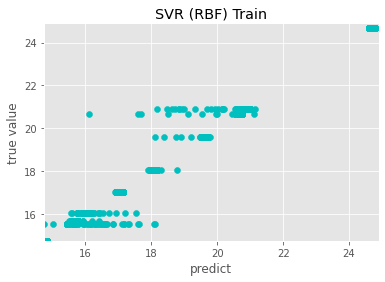

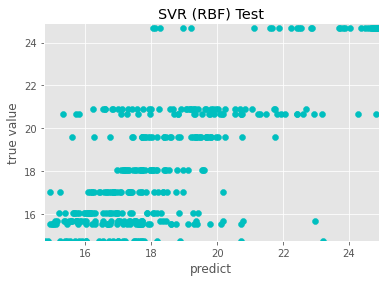

In [245]:
train_plot(RBF_predict_train,"SVR (RBF)")
test_plot(RBF_predict_test,"SVR (RBF)")

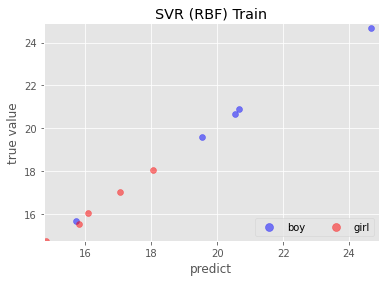

[[19.53301844]
 [24.67079495]
 [20.52681501]
 [20.66929835]
 [15.71439333]
 [17.06194225]
 [18.04674793]
 [15.81563216]
 [14.79576967]
 [16.07687774]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),train,0.02,0.13,0.09,0.0,1.0


In [246]:
average_train_plot(RBF_predict_train,"SVR (RBF)")


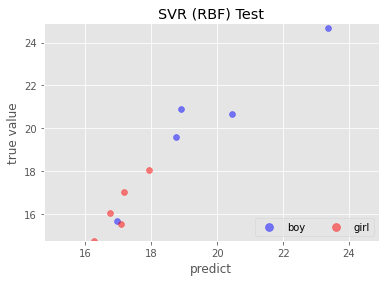

[[18.75793824]
 [23.34751985]
 [20.45210377]
 [18.90498214]
 [16.95525652]
 [17.17116673]
 [17.93583671]
 [17.08300334]
 [16.26659921]
 [16.73413369]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),test,1.35,1.16,0.97,0.08,0.85


In [247]:
average_test_plot(RBF_predict_test,"SVR (RBF)")

In [248]:
from sklearn import neural_network
regr = neural_network.MLPRegressor(hidden_layer_sizes=(100,100), activation="relu",
                 solver='lbfgs', alpha=0.0001,
                 batch_size=10, learning_rate="adaptive",
                 learning_rate_init=0.0001,
                 power_t=0.5, max_iter=1000,tol=1e-4)
regr.fit(train_X, train_y)

MLP_predict_train = regr.predict(train_X) 
MLP_predict_test = regr.predict(test_X) 

C:\Users\a0938\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [249]:
train_result(MLP_predict_train,"MLP")

Pearson關係數: [[1.         0.81828557]
 [0.81828557 1.        ]]


In [250]:
test_result(MLP_predict_test,"MLP")

Pearson關係數: [[1.         0.78466613]
 [0.78466613 1.        ]]


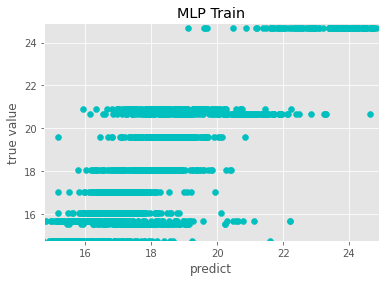

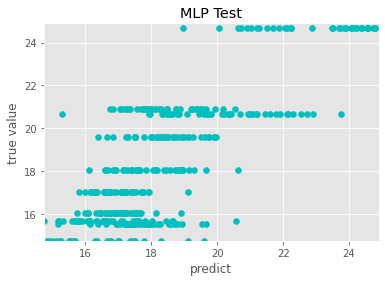

In [251]:
train_plot(MLP_predict_train,"MLP")
test_plot(MLP_predict_test,"MLP")

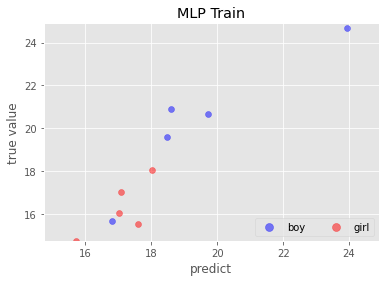

[[18.465531  ]
 [23.94481695]
 [19.7218459 ]
 [18.60184226]
 [16.80662302]
 [17.07315882]
 [18.02142144]
 [17.59248961]
 [15.72451106]
 [17.00587531]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),train,0.02,0.13,0.09,0.0,1.0
1,MLP,train,1.55,1.24,1.04,0.09,0.83


In [252]:
average_train_plot(MLP_predict_train,"MLP")

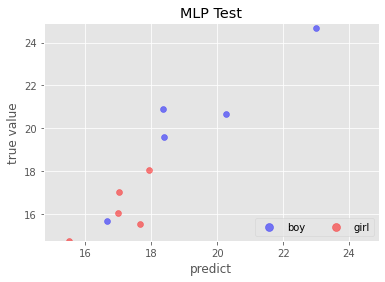

[[18.3949211 ]
 [22.99393769]
 [20.26658558]
 [18.35307039]
 [16.66149583]
 [17.00375893]
 [17.9350952 ]
 [17.66032415]
 [15.50922772]
 [16.99930034]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),test,1.35,1.16,0.97,0.08,0.85
1,MLP,test,1.8,1.34,1.09,0.1,0.8


In [253]:
average_test_plot(MLP_predict_test,"MLP")

In [254]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=6,n_estimators = 200,criterion = 'friedman_mse' )
rf.fit(train_X, train_y)

RF_predict_train = rf.predict(train_X) 
RF_predict_test = rf.predict(test_X) 

In [255]:
train_result(RF_predict_train,"Random Forest")


Pearson關係數: [[1.         0.91026618]
 [0.91026618 1.        ]]


In [256]:
test_result(RF_predict_test,"Random Forest")

Pearson關係數: [[1.         0.83577169]
 [0.83577169 1.        ]]


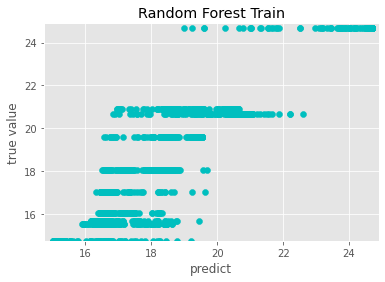

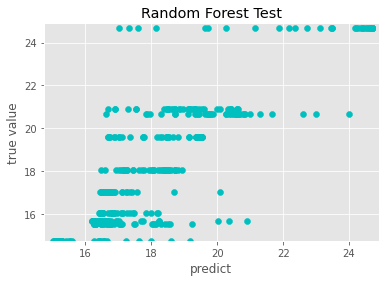

In [257]:
train_plot(RF_predict_train,"Random Forest")
test_plot(RF_predict_test,"Random Forest")

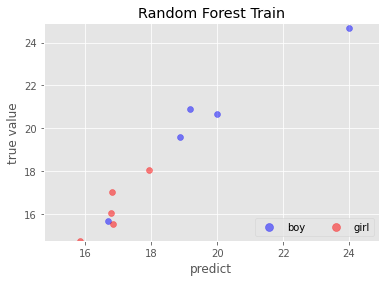

[[18.87576293]
 [23.98840253]
 [19.99658725]
 [19.15698175]
 [16.69789042]
 [16.80915075]
 [17.94190214]
 [16.84300259]
 [15.84570827]
 [16.7880686 ]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),train,0.02,0.13,0.09,0.0,1.0
1,MLP,train,1.55,1.24,1.04,0.09,0.83
2,Random Forest,train,0.91,0.96,0.84,0.05,0.9


In [258]:
average_train_plot(RF_predict_train,"Random Forest")


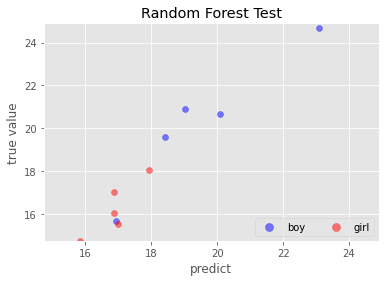

[[18.4052765 ]
 [23.08078447]
 [20.07299953]
 [19.00566865]
 [16.92209093]
 [16.8566305 ]
 [17.92580447]
 [17.00104716]
 [15.84207141]
 [16.85730396]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),test,1.35,1.16,0.97,0.08,0.85
1,MLP,test,1.8,1.34,1.09,0.1,0.8
2,Random Forest,test,1.37,1.17,1.03,0.07,0.85


In [259]:
average_test_plot(RF_predict_test,"Random Forest")

### Gradient Boost

In [260]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=0,loss = 'huber',n_estimators=250)
GB.fit(train_X, train_y)

GB_predict_train = GB.predict(train_X) 
GB_predict_test = GB.predict(test_X) 

In [261]:
train_result(GB_predict_train,"Gradient Boost")


Pearson關係數: [[1.        0.9696732]
 [0.9696732 1.       ]]


In [262]:
test_result(GB_predict_test,"Gradient Boost")

Pearson關係數: [[1.         0.87243898]
 [0.87243898 1.        ]]


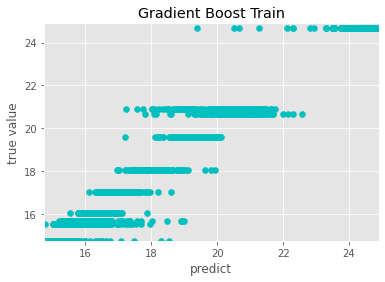

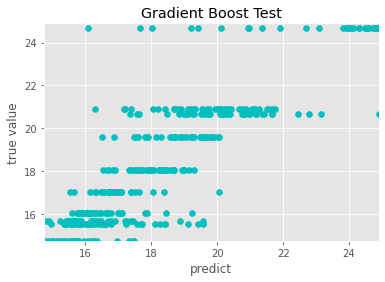

In [263]:
train_plot(GB_predict_train,"Gradient Boost")
test_plot(GB_predict_test,"Gradient Boost")

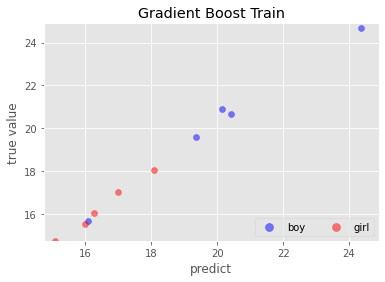

[[19.34590907]
 [24.36715783]
 [20.40615137]
 [20.13300234]
 [16.07991419]
 [16.98105433]
 [18.07894748]
 [15.98425397]
 [15.08591425]
 [16.26833667]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),train,0.02,0.13,0.09,0.0,1.0
1,MLP,train,1.55,1.24,1.04,0.09,0.83
2,Random Forest,train,0.91,0.96,0.84,0.05,0.9
3,Gradient Boost,train,0.14,0.37,0.31,0.01,0.98


In [264]:
average_train_plot(GB_predict_train,"Gradient Boost")


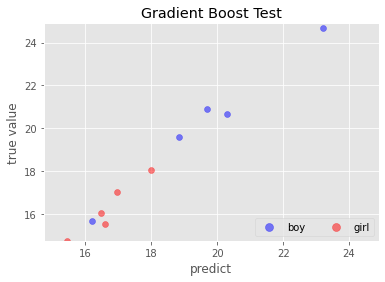

[[18.83284894]
 [23.22096664]
 [20.28895886]
 [19.69853646]
 [16.18584099]
 [16.9606607 ]
 [17.99880495]
 [16.58043857]
 [15.43502918]
 [16.45816136]]
[[19.61]
 [24.7 ]
 [20.66]
 [20.89]
 [15.66]
 [17.04]
 [18.06]
 [15.54]
 [14.74]
 [16.02]]


,Model name,dataset,MSE,RMSE,MAE,MAPE,R-squared
0,SVR (RBF),test,1.35,1.16,0.97,0.08,0.85
1,MLP,test,1.8,1.34,1.09,0.1,0.8
2,Random Forest,test,1.37,1.17,1.03,0.07,0.85
3,Gradient Boost,test,0.64,0.8,0.67,0.03,0.93


In [265]:
average_test_plot(GB_predict_test,"Gradient Boost")

### 結果儲存

In [266]:

final_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)

if not os.path.isdir(path+'\\迴歸結果\\'):
    os.makedirs(path+'\\迴歸結果\\')

train_df.to_csv(path_or_buf=path+'\\迴歸結果\\Train結果(1.5s).csv')
test_df.to_csv(path_or_buf=path+'\\迴歸結果\\Test結果(1.5s).csv')
final_df.to_csv(path_or_buf=path+'\\迴歸結果\\全部結果(1.5s).csv')
